In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('Section 1 data.csv')
df=pd.DataFrame(data)
df

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5
...,...,...,...,...,...,...,...,...,...,...,...
227576,2005-03-08,"It's not the Four Seasons, but more appropriat...",K4FAia2Iy5MVnmBLfS-mCg,WnY4HPJIYNXOPQH2mFzl2Q,THEhotel at Mandalay Bay,Hotels & Travel,Las Vegas,NV,36.092988,-115.177838,4.0
227577,2005-03-03,There is nothing better than happy hour on the...,G8Q9rASB6YI2ICBkkpwvcw,RgBq9TFI8q6-vCvF6wOMVg,Genna's Lounge,Bars,Madison,WI,43.072720,-89.384389,4.0
227578,2005-03-03,Easily my favorite place to eat in Madison. G...,8ITVDdfK07owxCA1x878Vw,3nwskbfFgsSjVe6T8keTeg,Lao Laan-Xang Restaurant,Thai,Madison,WI,43.083166,-89.364985,4.0
227579,2005-03-01,"Spacious, luxurious rooms that definitely meri...",WPOKvkacSKHx_bIG1alFiA,-7yF42k0CcJhtPw51oaOqQ,Bellagio,Hotels & Travel,Las Vegas,NV,36.112024,-115.174593,4.0


In [4]:
df.isna().sum()

Review_Date                   0
Review_Text                   1
User_ID                       0
Business_ID                   0
Business_Name                 0
Business_Category           284
City                          0
State                         0
Latitude                      0
Longitude                     0
Avg_Business_Star_Rating      0
dtype: int64

1.	How many unique restaurants could be found in this data set? (Hint: Use the [Business_ID] column for this evaluation.) 


In [5]:
unique_restaurants=len(df['Business_ID'].unique())
unique_restaurants

30276

2.	Which restaurant received the highest number of reviews? What about percentage-wise?  

The review_counts variable groups the data by Business_ID and counts the number of reviews for each restaurant.
most_reviewed_restaurant_id identifies the restaurant with the maximum number of reviews.
The name of the restaurant is then extracted using the corresponding Business_ID.
The most_reviewed_restaurant_count holds the highest number of reviews for a single restaurant.
total_reviews calculates the total number of reviews in the dataset.
The percentage of total reviews belonging to the most-reviewed restaurant is then computed and printed, along with the restaurant name and total review count.

In [25]:
review_counts = df.groupby('Business_ID').size()

most_reviewed_restaurant_id = review_counts.idxmax()
most_reviewed_restaurant_name = df[df['Business_ID'] == most_reviewed_restaurant_id]['Business_Name'].iloc[0]
most_reviewed_restaurant_count = review_counts.max()
total_reviews = df.shape[0]
percentage = round((most_reviewed_restaurant_count / total_reviews) * 100,2)
print(total_reviews,most_reviewed_restaurant_count,most_reviewed_restaurant_name,percentage)

227581 856 Mon Ami Gabi 0.38


3.	Which cities have got at least one 5-star review in Nevada (NV) state? 




The code filters the dataset to identify cities in Nevada (State == 'NV') that have received at least one 5-star review (Avg_Business_Star_Rating == 5). The results are grouped by the City column, and the size of each group is counted to determine how many 5-star reviews each city has received.

From the output:

Boulder City: 21 reviews
Henderson: 382 reviews
Las Vegas: 2694 reviews
Nellis: 4 reviews

In [15]:
five_star_grouped = df[(df['State'] == 'NV') & (df['Avg_Business_Star_Rating'] == 5)].groupby('City')
five_star_count = five_star_grouped.size()
five_star_count


City
Boulder City      21
Henderson        382
Las Vegas       2694
Nellis             4
dtype: int64

4.	Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?  

In [39]:
hotels_travel_df = df[df['Business_Category'] == 'Hotels & Travel']
review_counts_by_city = hotels_travel_df.groupby('City').size()
city_with_most_reviews = review_counts_by_city.idxmax()
most_reviews = review_counts_by_city.max()
total_reviews_Hotel_and_travel = hotels_travel_df.shape[0]

# Correct the percentage calculation and formatting
percentage = (most_reviews / total_reviews_Hotel_and_travel) * 100

print(f"The city with the most reviews in the 'Hotels & Travel' category is {city_with_most_reviews} with {most_reviews} reviews.")
print(f"This represents {percentage:.2f}% of the total reviews in the category.")


The city with the most reviews in the 'Hotels & Travel' category is Las Vegas with 10245 reviews.
This represents 77.64% of the total reviews in the category.


5.	At what day of the week people are more likely to post their reviews? 

In [44]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Extract day of the week from the 'Review_Date' column
# The day of the week with Monday=0, Sunday=6
df['Day_of_Week'] = df['Review_Date'].dt.dayofweek

# Map day of the week from numbers to actual day names
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['Day_of_Week'] = df['Day_of_Week'].map(day_mapping)

# Count the number of reviews for each day
review_counts_by_day = df['Day_of_Week'].value_counts()

# Identify the day with the highest number of reviews
most_reviews_day = review_counts_by_day.idxmax()

print(f"The day with the most reviews is {most_reviews_day} with {review_counts_by_day[most_reviews_day]} reviews.")

The day with the most reviews is Monday with 36446 reviews.


6.	Showcase if there are any trends regarding restaurant performance as time goes by. 

C:\Users\User\AppData\Local\Temp\ipykernel_19004\1474807454.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rating = df.resample('M', on='Review_Date')['Avg_Business_Star_Rating'].mean()


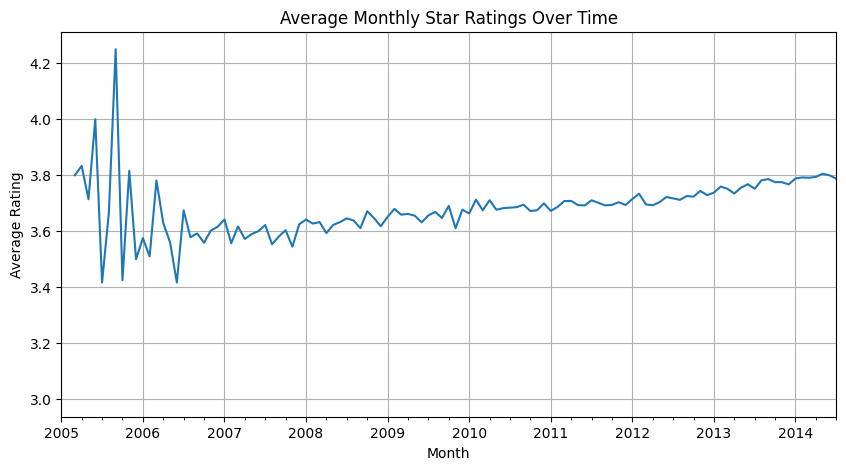

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by month and calculate average star rating
monthly_avg_rating = df.resample('M', on='Review_Date')['Avg_Business_Star_Rating'].mean()

# Plotting the trend of average monthly star ratings
plt.figure(figsize=(10, 5))
monthly_avg_rating.plot()
plt.title('Average Monthly Star Ratings Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19004\2947020100.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_review_count = df.resample('M', on='Review_Date')['Review_Text'].count()


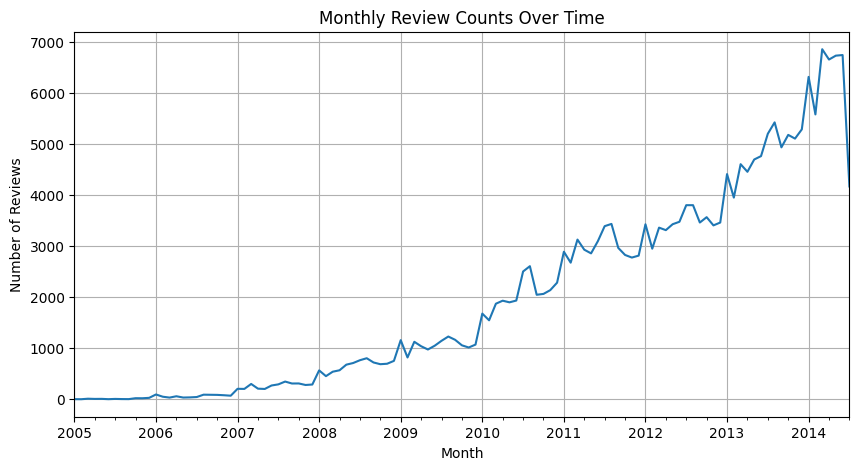

In [52]:
# Group by month and calculate average star rating
monthly_review_count = df.resample('M', on='Review_Date')['Review_Text'].count()

# Plotting the trend of monthly review counts
plt.figure(figsize=(10, 5))
monthly_review_count.plot()
plt.title('Monthly Review Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

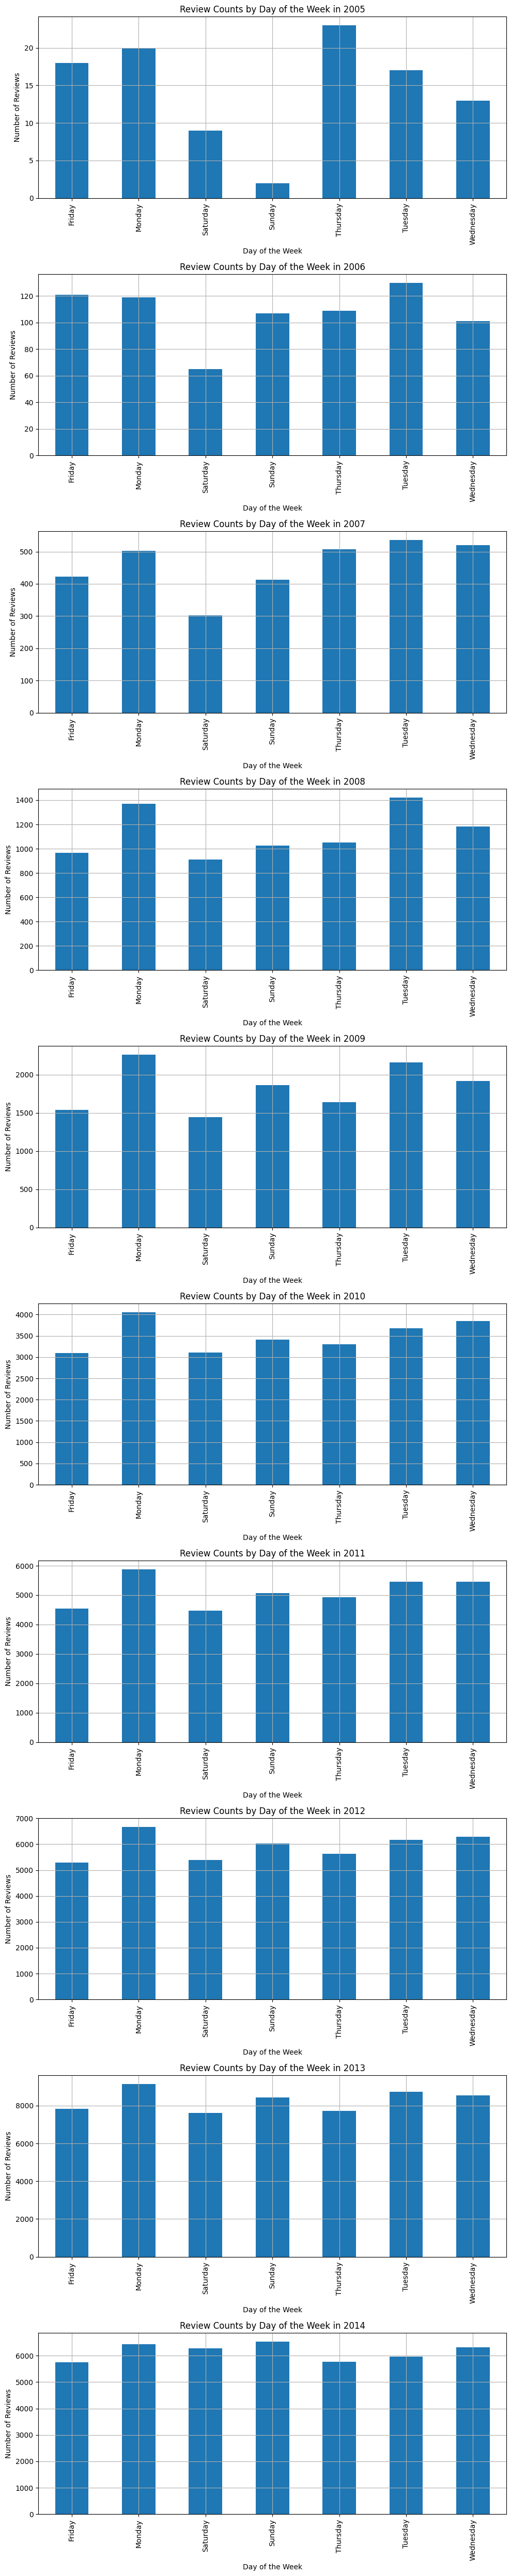

In [56]:
df['Year'] = df['Review_Date'].dt.year
# Map numbers to day names


# Group by Year and Day of the Week, then count reviews
review_counts_by_year_day = df.groupby(['Year', 'Day_of_Week']).size().unstack()

# Plotting
fig, axes = plt.subplots(nrows=len(review_counts_by_year_day.index), figsize=(10, 5 * len(review_counts_by_year_day.index)))
for (year, data), ax in zip(review_counts_by_year_day.iterrows(), axes):
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'Review Counts by Day of the Week in {year}')
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Number of Reviews')
    ax.grid(True)
plt.tight_layout()
plt.show()

In [64]:
average_ratings_by_year = df.groupby('Year')['Avg_Business_Star_Rating'].mean()
average_ratings_by_year

Year
2005    3.622549
2006    3.588431
2007    3.592101
2008    3.632379
2009    3.657304
2010    3.685897
2011    3.696744
2012    3.717803
2013    3.762827
2014    3.794501
Name: Avg_Business_Star_Rating, dtype: float64

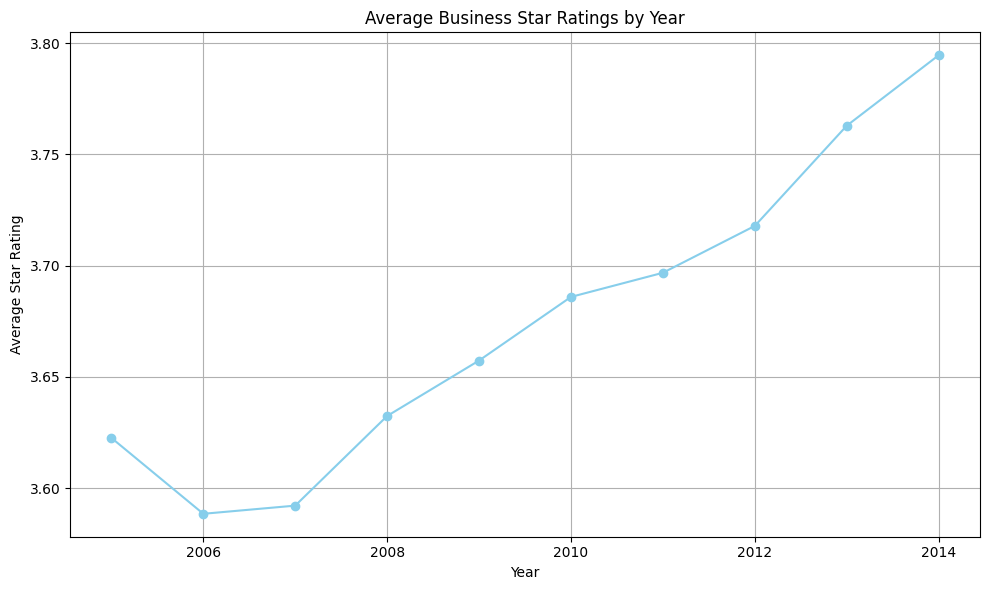

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
average_ratings_by_year.plot(ax=ax, marker='o', linestyle='-', color='skyblue')  # Using markers for each year

# Adding titles and labels
ax.set_title('Average Business Star Ratings by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Star Rating')
ax.grid(True)

# Displaying the plot
plt.tight_layout()
plt.show()

7.	Based on analyzed data showcase if there are any steps that the restaurant can take to improve their public appeal.   



In [81]:
business_avg_ratings = df.groupby('Business_ID')['Avg_Business_Star_Rating'].mean()

# Identify the 10 businesses with the lowest average ratings
lowest_rating_businesses = business_avg_ratings.nsmallest(100)
lowest_rating_business_ids = lowest_rating_businesses.index

# Extract names for these businesses
lowest_rating_business_names = df[df['Business_ID'].isin(lowest_rating_business_ids)][['Business_ID', 'Business_Name']].drop_duplicates().set_index('Business_ID').reindex(lowest_rating_business_ids)['Business_Name']
lowest_rating_business_names

Business_ID
-EP91N826V1U_tXVDGb__w                       Avalon Appliance Repair Inc
-GS_ZNY138B8weIpJLoRmA                                    Comfort Shoppe
-kxyZWgvoxMTlwlJPJK42w                                     Green Florist
-r61dvtbTVEJJCJlrqZJ1g                             Fuzion: Taste of Asia
0A8myHrHPpiZGvGyFIBA1w       Arizona Arthritis & Rheumatology Associates
                                               ...                      
If4U5EEbBWDNWe2Urd6RCw         Athena Marie - State Farm Insurance Agent
J5LLvLLSxLKq1mO9O-VDNw                                     24/7 Lock Pro
JuyVq7GwY5EZ_gL5cGfPiA                           Arizona Executive Maids
K7l8kVfpCWBhQpMHEhCv5w                               Goodman & Partridge
KEIZnBgejtOTiZSX_AVasg    Planned Parenthood Arizona Tempe Health Center
Name: Business_Name, Length: 100, dtype: object

In [80]:
usiness_avg_ratings = df.groupby('Business_ID')['Avg_Business_Star_Rating']

# Identify the 10 businesses with the lowest average ratings
lowest_rating_businesses = business_avg_ratings.nsmallest(100)
lowest_rating_business_ids = lowest_rating_businesses.index

# Filter the original DataFrame to get reviews for these businesses
lowest_ratings_df = df[df['Business_ID'].isin(lowest_rating_business_ids)]

# Extract only relevant columns for sentiment analysis (if 'Review_Text' is the column containing the review texts)
lowest_ratings_df = lowest_ratings_df[['Business_ID', 'Business_Name', 'Review_Text']]

# Display the new DataFrame structure and first few rows to confirm
print("New DataFrame for Sentiment Analysis:")
lowest_ratings_df


New DataFrame for Sentiment Analysis:


,Business_ID,Business_Name,Review_Text
385,4ghEtxHV0uhrpYRRWh7Whw,Arizona Republic,The worst marketing company i have ever worked...
1521,DCX0HhnZ9lQIqq93vvlskA,"House Hunters, LLC",Total SCAM! I contacted 3 properties and never...
1952,6QolvUp7cFFIWKRnJnh3GQ,Centurylink,Yelp really needs a zero star option. Words c...
2730,3hnZRPiWMoIaPtAx0KIZwg,Equity Auto Center,wish there was negative stars. They messed up...
5211,DbwG75e1GSQi0erSIR5aHA,U-Haul Co,I ordered a U-Box from UHaul and picked it up ...
...,...,...,...
219504,FaT_11h7TEHERVCNYJ4OBQ,Cvs Pharmacy,Came here while a robbery was in progress.\n\n...
221453,6HYAWv1hVAt-lQ6RPtjldw,AT & T Wireless,This review is not a review of the store but o...
222776,E0e5kYVua-LdFcJhC2ckeA,Patriot's Square Park,"Uh, it's definitely an eye sore. Not to mentio..."
223208,BiKEQt9D_CaVO3FHEnjZsw,University Inn and Suites,When first reserving a room at the inn I thoug...


In [83]:
from textblob import TextBlob
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the Review_Text
lowest_ratings_df['Sentiment_Score'] = lowest_ratings_df['Review_Text'].apply(analyze_sentiment)

# Group by Business_Name and calculate the average sentiment score
average_sentiment = lowest_ratings_df.groupby('Business_Name')['Sentiment_Score'].mean()

print(average_sentiment)
lowest_ratings_df

Business_Name
$2.50 Cleaners               0.420000
24/7 Lock Pro                0.089309
A Victory Inn               -0.713889
A-Apple Blossom Florist     -0.166667
ABC Towing                  -0.237130
                               ...   
Vegas Horse Tours           -0.577778
Vegas Western Cab Company    0.010741
Wardley Real Estate         -0.084889
West Valley Pawn & Gold      0.217857
iPowerWeb Inc                0.006571
Name: Sentiment_Score, Length: 97, dtype: float64


,Business_ID,Business_Name,Review_Text,Sentiment_Score
385,4ghEtxHV0uhrpYRRWh7Whw,Arizona Republic,The worst marketing company i have ever worked...,-0.071875
1521,DCX0HhnZ9lQIqq93vvlskA,"House Hunters, LLC",Total SCAM! I contacted 3 properties and never...,0.000000
1952,6QolvUp7cFFIWKRnJnh3GQ,Centurylink,Yelp really needs a zero star option. Words c...,-0.245833
2730,3hnZRPiWMoIaPtAx0KIZwg,Equity Auto Center,wish there was negative stars. They messed up...,-0.045556
5211,DbwG75e1GSQi0erSIR5aHA,U-Haul Co,I ordered a U-Box from UHaul and picked it up ...,0.007933
...,...,...,...,...
219504,FaT_11h7TEHERVCNYJ4OBQ,Cvs Pharmacy,Came here while a robbery was in progress.\n\n...,0.291667
221453,6HYAWv1hVAt-lQ6RPtjldw,AT & T Wireless,This review is not a review of the store but o...,0.278030
222776,E0e5kYVua-LdFcJhC2ckeA,Patriot's Square Park,"Uh, it's definitely an eye sore. Not to mentio...",0.088542
223208,BiKEQt9D_CaVO3FHEnjZsw,University Inn and Suites,When first reserving a room at the inn I thoug...,0.105833


$2.50 Cleaners (Sentiment: 0.42, Positive):

Insight: The sentiment for this business is moderately positive, indicating that customers generally have favorable experiences with their services.
Recommendation:
Continue focusing on quality service and affordable pricing, which seems to be appreciated by the customers.
To further improve customer satisfaction, consider gathering feedback on specific areas where services can be enhanced, such as speed, customer interaction, or offering additional services.
24/7 Lock Pro (Sentiment: 0.089, Neutral to Positive):

Insight: The sentiment is slightly positive, but close to neutral, indicating customers find the service satisfactory but not exceptional.
Recommendation:
Implement a customer engagement strategy to encourage more positive feedback, such as offering quick response times, and ensuring that locks and security systems are installed efficiently.
Consider introducing discounts or loyalty programs to create a stronger connection with repeat customers and improve the overall sentiment.
A Victory Inn (Sentiment: -0.71, Negative):

Insight: The sentiment is strongly negative, suggesting dissatisfaction among customers. Possible reasons could include poor service, unclean rooms, or a lack of amenities.
Recommendation:
Focus on addressing negative feedback by improving areas such as customer service, cleanliness, and amenities.
Launch a revamp campaign to highlight improvements made based on customer complaints. Offering discounted stays or promotions to regain trust could help improve sentiment.
Train staff on customer service and hospitality management to provide a more welcoming experience.
A-Apple Blossom Florist (Sentiment: -0.16, Slightly Negative):

Insight: The sentiment is slightly negative, indicating that customers might have had issues with timeliness, flower quality, or customer service.
Recommendation:
Improve delivery timeliness and flower quality to meet or exceed customer expectations.
Create a more personalized customer service experience, such as offering custom bouquets or personalized messages to add a unique touch.
Encourage customers to leave feedback or reviews, focusing on resolving specific complaints to turn sentiment positive.
ABC Towing (Sentiment: -0.23, Slightly Negative):

Insight: The sentiment is moderately negative, likely stemming from delays, pricing issues, or customer service dissatisfaction.
Recommendation:
Focus on reducing service response time and improving transparency in pricing.
Ensure that the staff communicates effectively with customers, especially in high-stress situations like car breakdowns.
Offer incentives such as discounts for repeat customers or a first-time user discount to encourage more positive reviews.
Vegas Horse Tours (Sentiment: -0.58, Negative):

Insight: The sentiment is significantly negative, indicating customer dissatisfaction. Issues could stem from pricing, customer service, or the quality of the horse tours.
Recommendation:
Improve the tour experience by focusing on the comfort and safety of customers, ensuring that guides are well-trained and informative.
Consider offering seasonal discounts or package deals to make the service more appealing to new customers.
Engage with past customers who left negative reviews, offering a discounted or complimentary tour to rectify the experience.
West Valley Pawn & Gold (Sentiment: 0.21, Positive):

Insight: The sentiment is positive but not overwhelmingly so. Customers seem to be satisfied, but there is room for improvement.
Recommendation:
Continue focusing on fair pricing and customer service.
Promote special sales or interest-free periods for loans to attract more customers and enhance the positive sentiment.
Encourage customers to leave more positive reviews, perhaps through incentives or a referral program.
iPowerWeb Inc (Sentiment: 0.007, Neutral):

Insight: The sentiment is almost neutral, indicating that customers may not have strong feelings about the service—neither very positive nor negative.
Recommendation:
Improve customer satisfaction by focusing on enhancing web services (e.g., improving uptime, customer support response time).
Consider launching a marketing campaign to highlight new features or customer success stories, potentially increasing customer engagement and loyalty.
Offer exclusive promotions for loyal customers to encourage more positive feedback.
Overall Recommendations:
Negative Sentiments: Businesses like A Victory Inn, ABC Towing, and Vegas Horse Tours should focus on customer service improvements, addressing specific complaints, and offering targeted promotional campaigns to regain customer trust.
Positive/Neutral Sentiments: Businesses like $2.50 Cleaners and West Valley Pawn & Gold are performing well but should seek ways to enhance customer engagement further through loyalty programs, personalized services, and discounts.
Reputation Management: Encourage all businesses to actively manage their online reputation by responding to both positive and negative reviews, showing that they care about customer feedback, and making improvements accordingly.

8.	Bonus Question – Based on this data set which user had the highest cumulative travel distance? What distance has been covered by him/her?

In [87]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame loaded with the necessary data
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    # Radius of earth in kilometers is approximately 6371
    km = 6371* c
    return km

# Sorting data by User_ID and Review_Date to ensure chronological order of visits
df = df.sort_values(by=['User_ID', 'Review_Date'])

# Calculating distances between consecutive visits for each user
df['Prev_Latitude'] = df.groupby('User_ID')['Latitude'].shift(1)
df['Prev_Longitude'] = df.groupby('User_ID')['Longitude'].shift(1)
df['Travel_Distance'] = df.apply(lambda x: haversine(x['Longitude'], x['Latitude'], x['Prev_Longitude'], x['Prev_Latitude']) if pd.notna(x['Prev_Longitude']) else 0, axis=1)

# Summarizing total travel distance per user
total_travel_per_user = df.groupby('User_ID')['Travel_Distance'].sum()

# Finding the user with the maximum travel distance
max_travel_user = total_travel_per_user.idxmax()
max_travel_distance = total_travel_per_user.max()

print(f"The user with the highest cumulative travel distance is {max_travel_user} with a total distance of {max_travel_distance:.2f} kilometers.")


The user with the highest cumulative travel distance is 6uYJ-ixRxPMyf-iEbhoz2g with a total distance of 31766.80 kilometers.
